<a href="https://colab.research.google.com/github/avani1998/ECE-6123-Image-and-Video-Processing/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
# from google.colab.patches import cv2_imshow
drive.mount('/content/drive')


Mounted at /content/drive


# Problem 1


## (a) 
Write 2D convolution function conv2, which implements same-padding convolution1. For simplicity, you can assume the  lter has an odd length in both vertical and horizontal directions. The input image should be grayscale. Assume pixel values outside the image are zero.

Approach: create a np array of zeros of the same size as the original image Since we want the filtered image to have the same size as the original image ,we will need to pad the original image. The amount to pad is calculated by using the formula p = (f-1)/2 where f is the filter dimension and p is the amount of padding we need to add in one dimension. 

Pad the original image with required amount of padding. Then, we iterate over the target image (desired filtered image) and calculate the convolution result as element-wise multiplication and summation of the results.

(3744, 5616, 3)


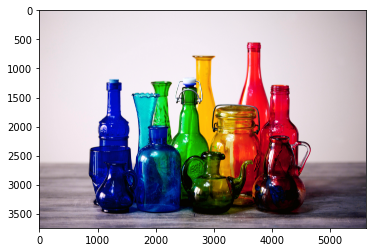

In [ ]:
img = cv2.imread("/content/drive/MyDrive/IVP_Assignments/rgb_image.jpeg")
print(img.shape)
plt.imshow(img)

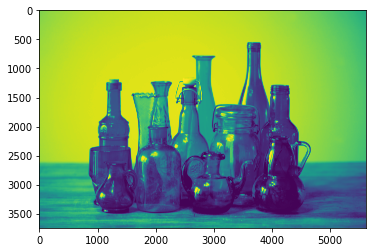

In [ ]:
# convert to greyscale
greyscale_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(greyscale_img)

In [ ]:
# define default filter matrix
filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

# calculating padding size for "same" convolution. Assuming we use only square filters. 
def calc_pad_size(kernel=filter):
  p = (filter.shape[0]- 1)/2
  #print("Padding required:",p)
  return(int(p))

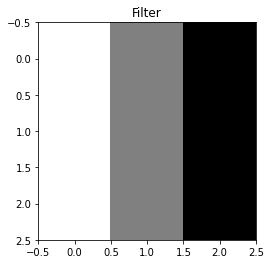

In [ ]:
plt.title("Filter")
plt.imshow(filter, cmap='gray')

In [ ]:
# pad image
def pad_image(img = greyscale_img,p=1):
  padded_img = np.zeros(shape=(greyscale_img.shape[0]+p+1, greyscale_img.shape[1]+p+1)) # create new np array of desired (padded) image size
  padded_img[p:-1,p:-1] = greyscale_img   
  #print("Padded image",padded_img)
  return padded_img

In [ ]:
# test
#pad_image()

In [ ]:

def conv2(img=greyscale_img,kernel=filter):
  # create target image
  target_img = np.zeros(shape=(img.shape[0], img.shape[1])) # target image of same size as original rgb_image
  # get padding size
  p = calc_pad_size(kernel)

  # pad the image
  img = pad_image(img,p)
  
  #kernel size 
  k = kernel.shape[0]

  # iterate over rows of target image
  for i in range(target_img.shape[0]):
    #iterate over columns of target image
    for j in range(target_img.shape[1]):
        # get submatrix of kernel size
        mat = img[i:i+k, j:j+k]

        # apply convolution
        #performing element-wise multiplication and summation of result
        target_img[i,j]= np.uint8(np.sum(np.multiply(mat, kernel)))
  return target_img

In [ ]:
# test
#target_img= conv2(greyscale_img,filter)

In [ ]:
#plt.imshow(target_img)

## (b)
Write a function *plot filtering* that uses your *conv2* function to  filter a given input image with a given input  lter and plots the following:
*   The original input image and  ltered image
*   The log-magnitude spectrum of the original image,  fillter, and output image.

Use a grayscale colormap and a colorbar for each plot. For your filter-response, use an FFT size equal to the size of your image.

In [ ]:
def plot_filtering(img=greyscale_img,kernel=filter):
  plt.figure(figsize=(15,15))
  f,a =plt.subplots(1,2, figsize=(15,15))
  plt.title("Original Image")
  a[0].imshow(img)
  filtered_img = conv2(img,kernel)
  # plt.subplot(1,2,2)
  plt.title("Filtered Image")
  a[1].imshow(filtered_img)

  # log-magnitude spectrum of image, filter and resulting image
  # array=[greyscale_img,filter,filtered_img]
  # for i in array:

  # img_float32 = np.float32(greyscale_img) #input image must be converted to float32
  # dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
  # dft_shift = np.fft.fftshift(dft)  
  # magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1])) 

  fif,ax=plt.subplots(1,3, figsize=(15,15))

  f = np.fft.fft2(greyscale_img)
  fshift = np.fft.fftshift(f) #frequency domain
  magnitude_spectrum = 20*np.log(np.abs(fshift)+1)  # calculate log magnitude spectrum  
  plt.title("Magnitude spectrum of image")
  ax[0].imshow(magnitude_spectrum, cmap='gray')  

  # img_float32 = np.float32(kernel)
  # dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
  # dft_shift = np.fft.fftshift(dft)
  # magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
  f = np.fft.fft2(kernel, s=[greyscale_img.shape[0], greyscale_img.shape[1]])
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20*np.log(np.abs(fshift)+1)

  plt.title("Magnitude spectrum of filter")
  ax[1].imshow(magnitude_spectrum, cmap='gray')

  # img_float32 = np.float32(filtered_img)
  # dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
  # dft_shift = np.fft.fftshift(dft)
  # magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

  f = np.fft.fft2(filtered_img)
  fshift = np.fft.fftshift(f)
  magnitude_spectrum = 20*np.log(np.abs(fshift+1))
  # plt.subplot(1,3,3)  
  plt.title("Magnitude spectrum of filtered image")
  ax[2].imshow(magnitude_spectrum, cmap='gray')


In [ ]:
#plot_filtering(greyscale_img,filter)

## (c) 
Use plot filtering on an image of your choice with the following 3  lters:
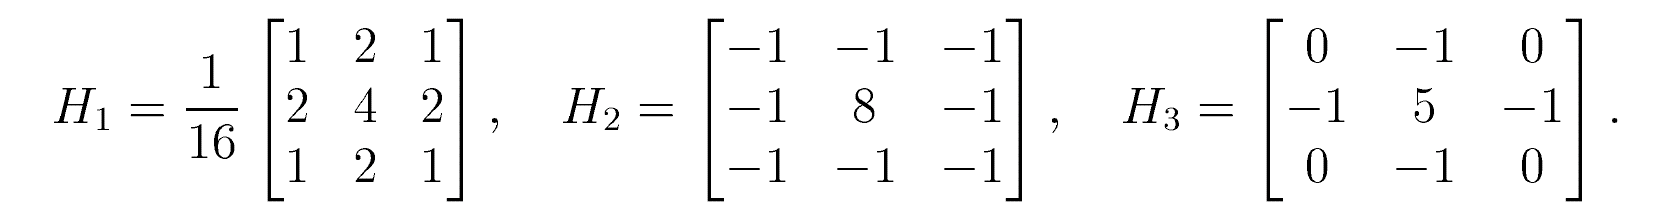

For each  filter, discuss the result of  ltering in both spatial and frequency domains.
Explain how the filtering effect in the image domain correlates with the filter and its frequency response.

<Figure size 1080x1080 with 0 Axes>

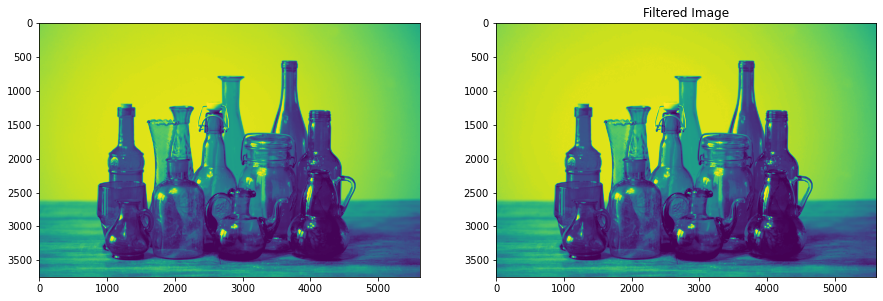

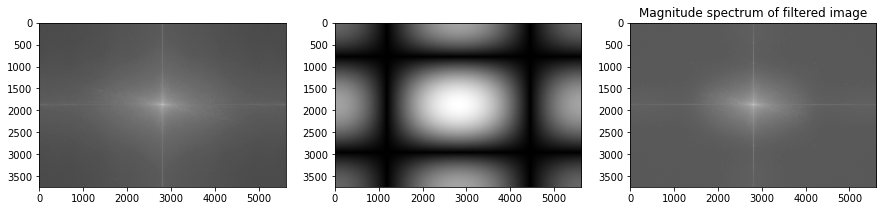

<Figure size 1080x1080 with 0 Axes>

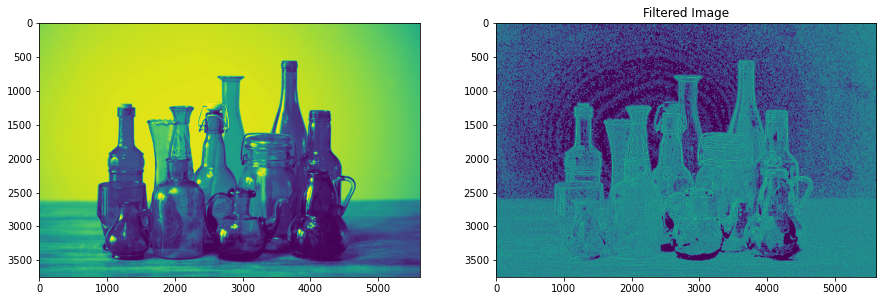

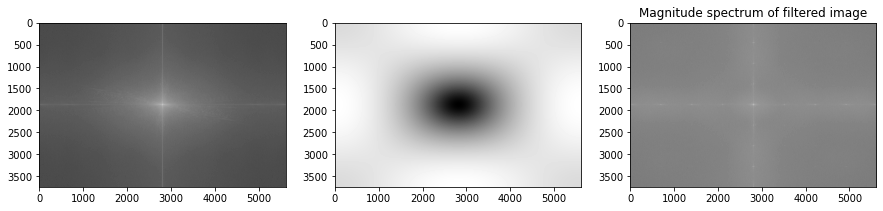

<Figure size 1080x1080 with 0 Axes>

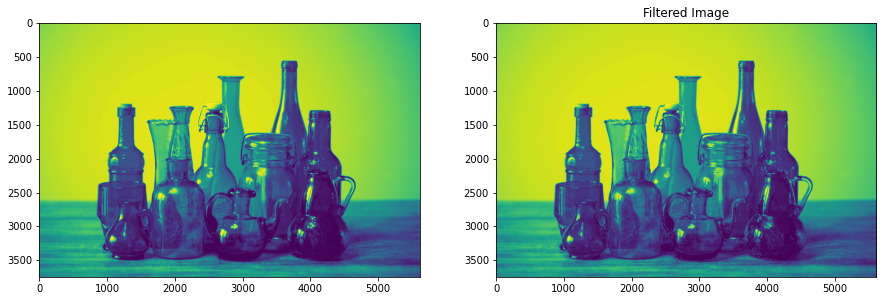

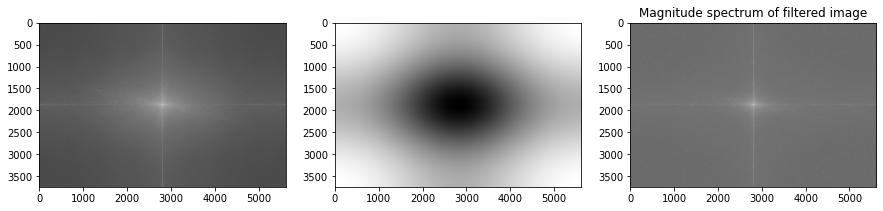

In [ ]:
h1 = np.divide(0.0625,np.array([[1,2,1],[2,4,2],[1,2,1]]))
h2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
h3 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
kernels = [h1,h2,h3]
for k in kernels:
  plot_filtering(kernel=k)

# Problem 2

## (a) 
Write a function awgn that takes in an input image and noise-level  sigma(n) and adds i.i.d zero-mean Gaussian random noise with standard-deviation  sigma(n).
(see numpy.random.randn)

In [ ]:
def awgn(sigma,img=greyscale_img,mean=0):
  img=img.astype(np.float32)

  gaussian = np.random.normal(loc=mean, scale = sigma, size = img.shape)*255
  noisy_img = img + gaussian

  cv2.normalize(noisy_img, noisy_img, 0, 255, cv2.NORM_MINMAX, dtype=-1)

  return noisy_img

Gaussian Filter = $G(x,y) = (1/2Πσ^2) * e^(-(x^2+y^2)/2σ^2)$

## (b) 
Write a function gaussian_filter which returns a 2D Gaussian filter of size m x m with standard deviation sigma , where m = ceil(5*sigma).Be sure to normalize your filter to sum to 1 so that filtering does not shift the mean of your image

In [ ]:
def gaussian_filter(sigma):
  m = int(np.ceil(5*sigma))
  filter = np.zeros(shape=(m,m)) # initialize np array of shape 5*sigma by 5*sigma 
  # center = np.floor(m/2)

  m = int(np.floor(m / 2))

  for x in range(-m,m+1):
      for y in range(-m,m+1):
          filter[x+m,y+m]=(1/(2*np.pi*sigma**2))*np.exp(-(x**2 + y**2)/(2*sigma**2))
  filter /= filter.sum()
  # print("sum:",np.sum(filter)) # Print sum of matrix to check if sum = 1
  return filter

In [ ]:
gaussian_filter(1)

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

## (c) 
Generate a noisy version of an image using awgn, with a noise-level  sigma(n) = 0.1 on an image intensity scale of [0, 1]. Apply separately a Gaussian  filter of size 5 x 5 and average-filter of size 5 x 5, and comment on how the  filters compare in their noise-removal, qualitatively. Repeat this for a few different noise-levels and  lter sizes. Each time, calculate the PSNR3 of your noisy and denoised images via the formula,
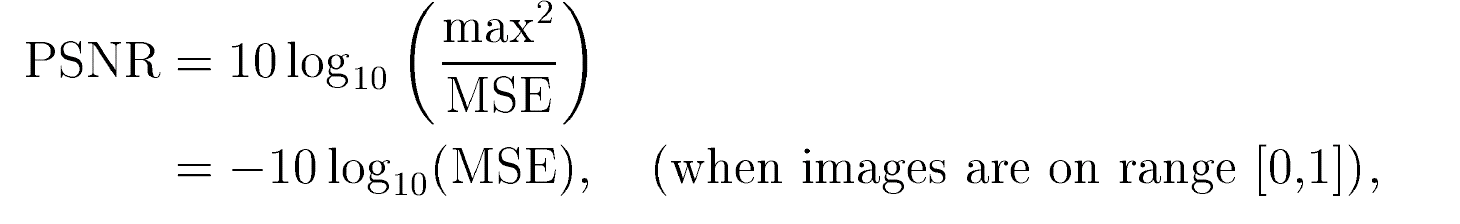

where MSE is the mean-squared-error with respect to your original image, and max is the maximum of your image intensity range (1 for images on range [0,1], 255 for images on range [0,255]).

In [ ]:
from scipy.signal import convolve2d

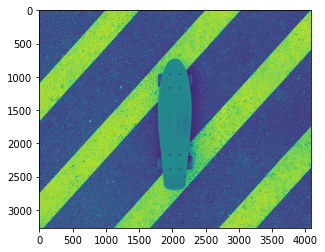

In [ ]:
img = cv2.imread("/content/drive/MyDrive/IVP_Assignments/skateboard.jpeg")
skateboard = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(skateboard)

### Considering $σ = 1$

PSNR of Average Kernel of size 5X5 = 24.54644149221307
PSNR of Average Kernel of size 7x7 = 24.134023693055585
PSNR of Gaussian Kernel of size 5X5 = 25.790116088259843
PSNR of Average Kernel of size 7x7 = 25.790116088259843


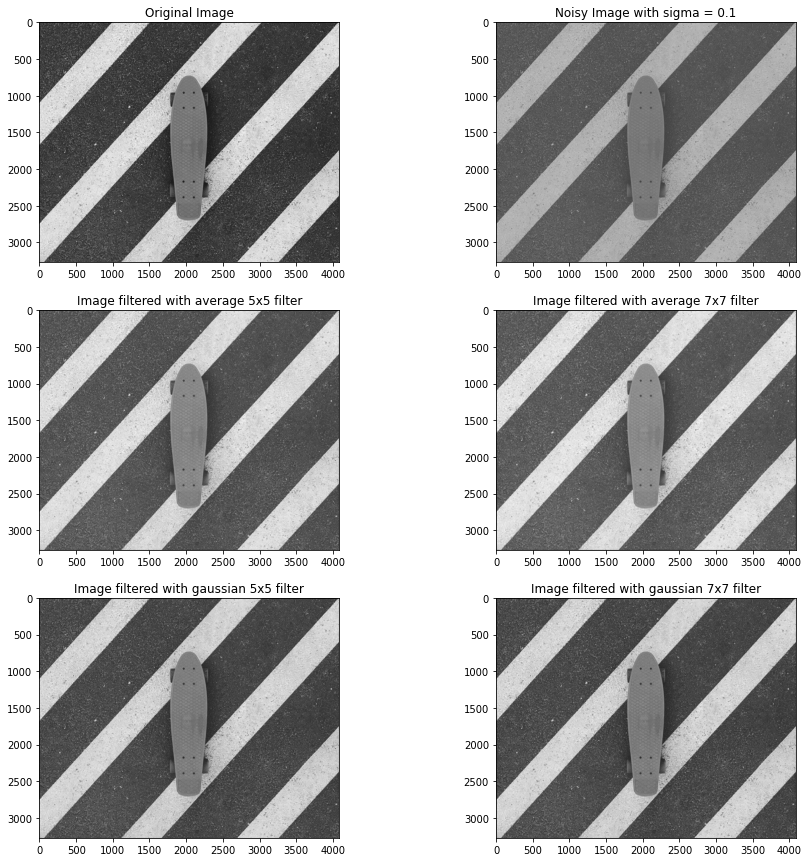

In [ ]:
img = awgn(sigma = 0.1, img = skateboard)

avg_filter_5x5 = np.ones((5,5))/25
gauss_filter_5x5 = gaussian_filter(1)

avg_filter_7x7 = np.ones((7,7))/49
gauss_filter_7x7 = gaussian_filter(1)

avg_out_5x5 = convolve2d(img,avg_filter_5x5,mode='same')
gauss_out_5x5 = convolve2d(img,gauss_filter_5x5,mode='same')

avg_out_7x7 = convolve2d(img,avg_filter_7x7,mode='same')
gauss_out_7x7 = convolve2d(img,gauss_filter_7x7,mode='same')

PSNR_avg_5x5 = 10*np.log10(255**2/np.square(np.subtract(img,avg_out_5x5)).mean())
PSNR_gauss_5x5 = 10*np.log10(255**2/np.square(np.subtract(img,gauss_out_5x5)).mean())

PSNR_avg_7x7 = 10*np.log10(255**2/np.square(np.subtract(img,avg_out_7x7)).mean())
PSNR_gauss_7x7 = 10*np.log10(255**2/np.square(np.subtract(img,gauss_out_7x7)).mean())

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.title("Original Image")
plt.imshow(skateboard, cmap='gray')

plt.subplot(3,2,2)
plt.title("Noisy Image with sigma = 0.1")
plt.imshow(img,cmap='gray')

plt.subplot(3,2,3)
plt.title("Image filtered with average 5x5 filter")
plt.imshow(avg_out_5x5,cmap='gray')

plt.subplot(3,2,4)
plt.title("Image filtered with average 7x7 filter")
plt.imshow(avg_out_7x7,cmap='gray')

plt.subplot(3,2,5)
plt.title("Image filtered with gaussian 5x5 filter")
plt.imshow(gauss_out_5x5,cmap='gray')

plt.subplot(3,2,6)
plt.title("Image filtered with gaussian 7x7 filter")
plt.imshow(gauss_out_5x5,cmap='gray')

print("PSNR of Average Kernel of size 5X5 =", str(PSNR_avg_5x5))
print("PSNR of Average Kernel of size 7x7 =", str(PSNR_avg_7x7))
print("PSNR of Gaussian Kernel of size 5X5 =", str(PSNR_gauss_5x5))
print("PSNR of Average Kernel of size 7x7 =", str(PSNR_gauss_7x7))

### Considering $σ = 0.8$

PSNR of Average Kernel of size 5X5 = 30.55442084277173
PSNR of Average Kernel of size 7x7 = 27.837714692382654
PSNR of Gaussian Kernel of size 5X5 = 34.67125818271265
PSNR of Average Kernel of size 7x7 = 34.67125818271265


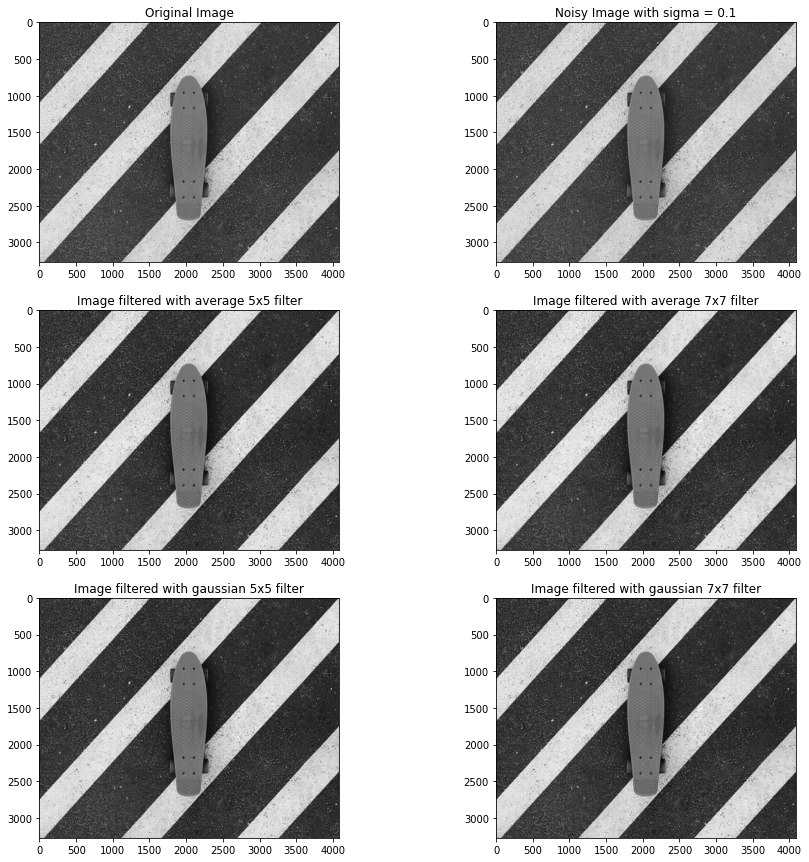

In [ ]:
img = awgn(sigma = 0.01, img = skateboard)

avg_out_5x5 = convolve2d(img,avg_filter_5x5,mode='same')
gauss_out_5x5 = convolve2d(img,gauss_filter_5x5,mode='same')

avg_out_7x7 = convolve2d(img,avg_filter_7x7,mode='same')
gauss_out_7x7 = convolve2d(img,gauss_filter_7x7,mode='same')

PSNR_avg_5x5 = 10*np.log10(255**2/np.square(np.subtract(img,avg_out_5x5)).mean())
PSNR_gauss_5x5 = 10*np.log10(255**2/np.square(np.subtract(img,gauss_out_5x5)).mean())

PSNR_avg_7x7 = 10*np.log10(255**2/np.square(np.subtract(img,avg_out_7x7)).mean())
PSNR_gauss_7x7 = 10*np.log10(255**2/np.square(np.subtract(img,gauss_out_7x7)).mean())

plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.title("Original Image")
plt.imshow(skateboard, cmap='gray')

plt.subplot(3,2,2)
plt.title("Noisy Image with sigma = 0.1")
plt.imshow(img,cmap='gray')

plt.subplot(3,2,3)
plt.title("Image filtered with average 5x5 filter")
plt.imshow(avg_out_5x5,cmap='gray')

plt.subplot(3,2,4)
plt.title("Image filtered with average 7x7 filter")
plt.imshow(avg_out_7x7,cmap='gray')

plt.subplot(3,2,5)
plt.title("Image filtered with gaussian 5x5 filter")
plt.imshow(gauss_out_5x5,cmap='gray')

plt.subplot(3,2,6)
plt.title("Image filtered with gaussian 7x7 filter")
plt.imshow(gauss_out_5x5,cmap='gray')

print("PSNR of Average Kernel of size 5X5 =", str(PSNR_avg_5x5))
print("PSNR of Average Kernel of size 7x7 =", str(PSNR_avg_7x7))
print("PSNR of Gaussian Kernel of size 5X5 =", str(PSNR_gauss_5x5))
print("PSNR of Average Kernel of size 7x7 =", str(PSNR_gauss_7x7))